<a href="https://colab.research.google.com/github/maskot1977/Python2020/blob/1202/78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Wed Dec  2 09:02:57 UTC 2020


In [2]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

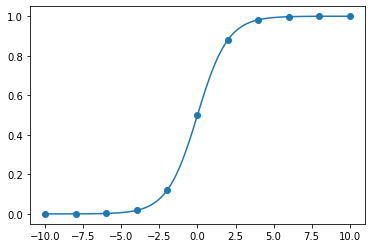

In [4]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, fx_observed)
plt.plot(x_latent, f(x_latent))
plt.show()

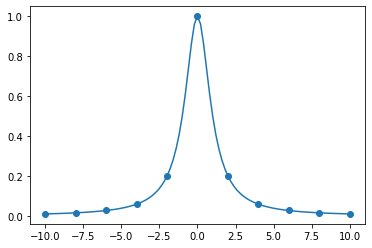

In [5]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, gx_observed)
plt.plot(x_latent, g(x_latent))
plt.show()

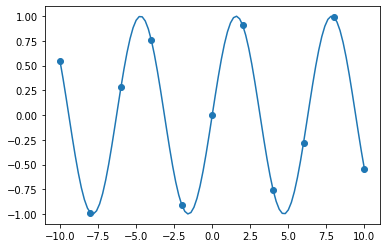

In [6]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, hx_observed)
plt.plot(x_latent, h(x_latent))
plt.show()

# 解法１

In [7]:
def get_coeff(i, x, x_observed):
    c = 1
    for j in range(len(x_observed)):
        if j != i:
            c *= (x - x_observed[j]) / (x_observed[i] - x_observed[j])
    return c

In [8]:
def llagrange_fit(x, x_observed, y_observed):
    sum = 0
    for i in range(len(x_observed)):
        sum += get_coeff(i, x, x_observed) * y_observed[i]
    return sum

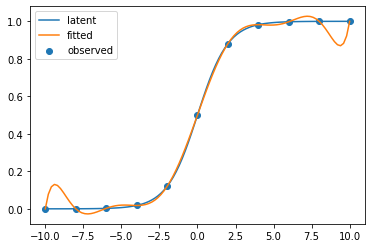

In [9]:
import matplotlib.pyplot as plt

y_pred = [llagrange_fit(x, x_observed, fx_observed) for x in x_latent]

plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()

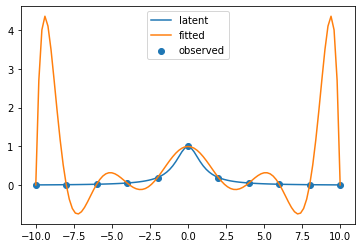

In [10]:
import matplotlib.pyplot as plt

y_pred = [llagrange_fit(x, x_observed, gx_observed) for x in x_latent]

plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()

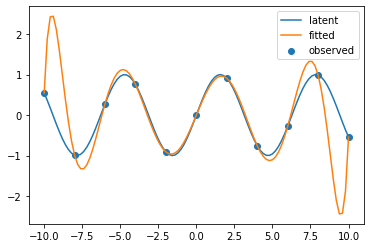

In [11]:
import matplotlib.pyplot as plt

y_pred = [llagrange_fit(x, x_observed, hx_observed) for x in x_latent]

plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()

In [12]:
!date

Wed Dec  2 09:02:58 UTC 2020


# 解法２

In [13]:
def lagurange(x, x_observed, y_observed):
    interpolation = 0
    px = [1] * len(x_observed)
    qx = [1] * len(x_observed)
    for i in range (len(x_observed)):
        for j in range (len(x_observed)):
            if i != j:
                px[i] = px[i] * (x - x_observed[j])
                qx[i] = qx[i] * (x_observed[i] - x_observed[j])
        interpolation = interpolation + px[i] * y_observed[i] / qx[i]
    return interpolation

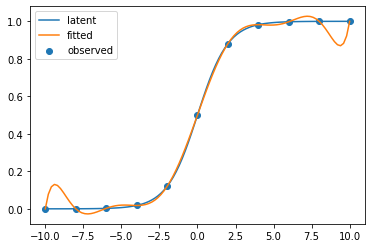

In [14]:
import matplotlib.pyplot as plt

y_pred = lagurange(x_latent, x_observed, fx_observed)

plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()

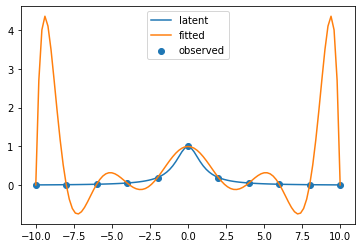

In [15]:
import matplotlib.pyplot as plt

y_pred = lagurange(x_latent, x_observed, gx_observed)

plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()

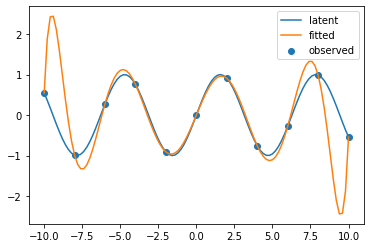

In [16]:
import matplotlib.pyplot as plt

y_pred = lagurange(x_latent, x_observed, hx_observed)

plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()

In [17]:
!date

Wed Dec  2 09:02:59 UTC 2020
